In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv('fruta.csv')

In [3]:
dataset[dataset.Produto=='Acerola']

,Produto,Und.,Proced.,Tipo,Pr.Min.,Pr.M.Com.,Pr.Máx.,Sit.Merc.,Data
5,Acerola,Cx .20a23Kg,PE-PB,NaN,"R$ 25,00","R$ 30,00","R$ 30,00",Est,11/05/2021
84,Acerola,Cx .20a23Kg,PE-PB,NaN,"R$ 25,00","R$ 30,00","R$ 35,00",Fir,10/05/2021
163,Acerola,Cx .20a23Kg,PE-PB,NaN,"R$ 20,00","R$ 25,00","R$ 25,00",Fir,07/05/2021
242,Acerola,Cx .20a23Kg,PE-PB,NaN,"R$ 15,00","R$ 20,00","R$ 25,00",Est,06/05/2021
321,Acerola,Cx .20a23Kg,PE-PB,NaN,"R$ 15,00","R$ 20,00","R$ 25,00",Est,05/05/2021
...,...,...,...,...,...,...,...,...,...
163559,Acerola,Cx .20Kg,PE-PB,-,"R$ 20,00","R$ 30,00","R$ 35,00",Fir,09/01/2013
163644,Acerola,Cx .20Kg,PE-PB,-,"R$ 20,00","R$ 25,00","R$ 30,00",Fra,08/01/2013
163729,Acerola,Cx .20Kg,PE-PB,-,"R$ 25,00","R$ 30,00","R$ 35,00",Fra,07/01/2013
163814,Acerola,Cx .20Kg,PE-PB,-,"R$ 30,00","R$ 35,00","R$ 35,00",Fra,04/01/2013


In [4]:
#Renomeando colunas
dataset.rename(columns={'Und.':'Und','Proced.':'Proced','Pr.Min.':'PrMin','Pr.M.Com.':'PrMCom','Sit.Merc.':'SitMerc','Pr.Máx.':'PrMáx'},inplace=True)

## Tratamento de dados
**Realizado:**

* Transformar valores literais em numéricos;
* Uso de apply para transformar os preços das colunas 'Pr.Min.', 'Pr.M.Com.' e 'Pr.Máx.'de string para float;
* Uso de factorize nas colunas: 'Sit.Merc.', 'Und.', 'Proced.';
* Sortar pela coluna data de forma ascendente.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163979 entries, 0 to 163978
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Produto  163979 non-null  object
 1   Und      163979 non-null  object
 2   Proced   161763 non-null  object
 3   Tipo     146820 non-null  object
 4   PrMin    163979 non-null  object
 5   PrMCom   163979 non-null  object
 6   PrMáx    163979 non-null  object
 7   SitMerc  163973 non-null  object
 8   Data     163979 non-null  object
dtypes: object(9)
memory usage: 11.3+ MB


In [6]:
frutas = dataset['Produto'].unique()
frutas

array(['Abacate', 'Abacaxi perola', 'Acerola', 'Banana Comprida',
       'Banana Maçã', 'Banana Pacovan', 'Banana Prata', 'Caja',
       'Caja Umbu', 'Caju', 'Coco Seco', 'Coco Verde', 'Goiaba',
       'Graviola', 'Jaca', 'Laranja Mimo', 'Laranja Mino', 'Laranja Pera',
       'Limão', 'Maçã 113/125 Frutos', 'Maçã 120/165 Frutos',
       'Maçã 125/135 Frutos', 'Maçã 180/198 Frutos',
       'Maçã 220/250 Frutos', 'Mamão', 'Manga', 'Mangaba', 'Maracujá',
       'Melancia', 'Melão', 'Morango', 'Pera 130a150 Frutos',
       'Pera 80a125 Frutos', 'Pessego', 'Pinha', 'Pitomba', 'Sapoti',
       'Seriguela', 'Tamarindo', 'Tangerina', 'Umbu', 'Uva',
       'Laranaja Mino', 'Ameixa Seca', 'Morango ', 'Pitanga',
       'Ma çã125/135 Frutos', 'Maçã 163/175 Frutos', 'Banana Mçã',
       'Limão  ', 'Banana  Maçã', 'Banana  Maça', 'Maçã113/125 Frutos',
       'Maçã125/135 Frutos', 'Maçã163/175 Frutos', 'Maçã180/198 Frutos',
       'Limão ', 'Limão Tai', 'Maçã; 120/165 Frutos', 'Banana  Mação',
      

In [7]:
def turn_into_float(row):
    split1 = row['PrMin'].split(' ')
    split2 = row['PrMCom'].split(' ')
    split3 = row['PrMáx'].split(' ')
    row['PrMin'] = split1[1].replace(',', '.')
    row['PrMCom'] = split2[1].replace(',', '.')
    row['PrMáx'] = split3[1].replace(',', '.')
    return row

dataset.apply(turn_into_float, axis=1)

dataset["PrMin"] = pd.to_numeric(dataset["PrMin"], downcast="float")
dataset["PrMCom"] = pd.to_numeric(dataset["PrMCom"], downcast="float")
dataset["PrMáx"] = pd.to_numeric(dataset["PrMáx"], downcast="float")

dataset.head()

,Produto,Und,Proced,Tipo,PrMin,PrMCom,PrMáx,SitMerc,Data
0,Abacate,Kg,-,Comum,0.0,0.0,0.0,Aus,11/05/2021
1,Abacate,Kg,SP-MG,Manteiga,3.0,3.5,4.0,Est,11/05/2021
2,Abacaxi perola,Cento,PB-PE,Grande,300.0,320.0,350.0,Fra,11/05/2021
3,Abacaxi perola,Cento,PB-PE,Médio,200.0,230.0,250.0,Est,11/05/2021
4,Abacaxi perola,Cento,PB-PE,Pequeno,100.0,120.0,150.0,Est,11/05/2021


In [8]:
dataset[dataset['Produto']==frutas[0]].iloc[-1:,5]

163895    200.0
Name: PrMCom, dtype: float32

In [9]:
dataset['Data']

0         11/05/2021
1         11/05/2021
2         11/05/2021
3         11/05/2021
4         11/05/2021
             ...    
163974    03/01/2013
163975    03/01/2013
163976    03/01/2013
163977    03/01/2013
163978    03/01/2013
Name: Data, Length: 163979, dtype: object

# Plotando valores das cotas entre  2013 e 2021

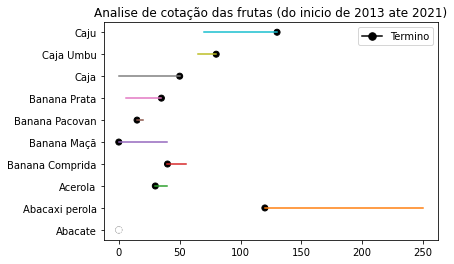

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

ponto = mlines.Line2D([], [], color='black', marker='.',
                          markersize=15, label='Termino')

precoMedio = []

for fruta in frutas[:10]:
    precoMedio = [dataset[dataset['Produto']==fruta].iloc[-1:,5],dataset[dataset['Produto']==fruta].iloc[:1,5]]
    plt.plot(precoMedio,[fruta,fruta])
    plt.scatter(precoMedio,[fruta,fruta],c=[1,0],cmap='Greys')
plt.title('Analise de cotação das frutas (do inicio de 2013 ate 2021)')
plt.legend(handles=[ponto])

In [15]:
dataset['Data'] = pd.to_datetime(dataset['Data'], dayfirst=True)
dataset.sort_values(by=['Data'], inplace=True, ascending=True)

In [16]:
dataset['SitMerc'] = pd.factorize(dataset['SitMerc'])[0] + 1
dataset['Und'] = pd.factorize(dataset['Und'])[0] + 1
dataset['Proced'] = pd.factorize(dataset['Proced'])[0] + 1
dataset.head()

,Produto,Und,Proced,Tipo,PrMin,PrMCom,PrMáx,SitMerc,Data
163978,Uva,1,1,Benitaca,55.0,60.0,60.0,1,2013-01-03
163976,Uva,2,1,Preta,38.0,40.0,40.0,2,2013-01-03
163975,Uva,1,1,Itália,50.0,55.0,60.0,3,2013-01-03
163974,Uva,3,2,Benitaca,0.0,0.0,0.0,4,2013-01-03
163973,Uva,4,2,Preta,0.0,0.0,0.0,4,2013-01-03


In [17]:
dataset.tail()

,Produto,Und,Proced,Tipo,PrMin,PrMCom,PrMáx,SitMerc,Data
3,Abacaxi perola,15,24,Médio,200.0,230.0,250.0,2,2021-05-11
2,Abacaxi perola,15,24,Grande,300.0,320.0,350.0,5,2021-05-11
1,Abacate,12,93,Manteiga,3.0,3.5,4.0,2,2021-05-11
58,Melão,12,10,Espanhol,1.2,1.3,1.5,2,2021-05-11
0,Abacate,12,2,Comum,0.0,0.0,0.0,4,2021-05-11


## Filtrar dataset

- Nao necessario mudar o valor unitario, pois todos estao perto da mesma unidade

In [21]:
acerola = dataset.loc[dataset['Produto'] == 'Acerola']
acerola.head()

,Produto,Und,Proced,Tipo,PrMin,PrMCom,PrMáx,SitMerc,Data
163899,Acerola,10,23,-,30.0,40.0,40.0,5,2013-01-03
163814,Acerola,10,23,-,30.0,35.0,35.0,5,2013-01-04
163729,Acerola,10,23,-,25.0,30.0,35.0,5,2013-01-07
163644,Acerola,10,23,-,20.0,25.0,30.0,5,2013-01-08
163559,Acerola,10,23,-,20.0,30.0,35.0,3,2013-01-09


In [22]:
acerola['Und'].unique()

array([10, 55], dtype=int64)

In [23]:
dataset[dataset['Und'] == 55]

,Produto,Und,Proced,Tipo,PrMin,PrMCom,PrMáx,SitMerc,Data
2928,Acerola,55,23,NaN,30.0,35.0,35.0,2,2021-03-17
2849,Acerola,55,23,NaN,25.0,35.0,40.0,2,2021-03-18
2770,Acerola,55,23,NaN,30.0,35.0,40.0,2,2021-03-19
2691,Acerola,55,23,NaN,30.0,35.0,40.0,2,2021-03-22
2612,Acerola,55,23,NaN,25.0,30.0,35.0,5,2021-03-23
2533,Acerola,55,23,NaN,25.0,30.0,35.0,2,2021-03-24
2454,Acerola,55,23,NaN,25.0,30.0,35.0,2,2021-03-25
2375,Acerola,55,23,NaN,30.0,35.0,40.0,3,2021-03-26
2296,Acerola,55,23,NaN,20.0,20.0,25.0,5,2021-03-29
2217,Acerola,55,23,NaN,20.0,20.0,25.0,2,2021-03-30


# Plotando como o Preço medio de compra varia com o tempo

<AxesSubplot:xlabel='Data', ylabel='PrMCom'>

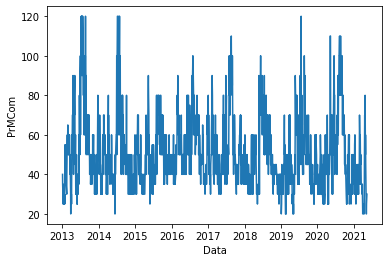

In [24]:
import seaborn as sns

sns.lineplot(data=acerola, x='Data', y='PrMCom')

## Series Temporais

* Dividir o dataset baseado em series temporais;
* Usar o Support Vector Machines como modelo.

In [26]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

In [27]:
from datetime import timedelta

list_date = []
list_index = []

date = acerola['Data'].iloc[-1]
for i in range(1,3):
    date += timedelta(days=1)
    list_date.append(date)
    list_index.append(-i)
nextDay = {'Data':list_date}
nextDay = pd.DataFrame(data=nextDay,index=list_index)
nextDay

,Data
-1,2021-05-12
-2,2021-05-13


In [28]:
frames = [acerola,nextDay]
acerola = pd.concat(frames)
acerola

,Produto,Und,Proced,Tipo,PrMin,PrMCom,PrMáx,SitMerc,Data
163899,Acerola,10.0,23.0,-,30.0,40.0,40.0,5.0,2013-01-03
163814,Acerola,10.0,23.0,-,30.0,35.0,35.0,5.0,2013-01-04
163729,Acerola,10.0,23.0,-,25.0,30.0,35.0,5.0,2013-01-07
163644,Acerola,10.0,23.0,-,20.0,25.0,30.0,5.0,2013-01-08
163559,Acerola,10.0,23.0,-,20.0,30.0,35.0,3.0,2013-01-09
...,...,...,...,...,...,...,...,...,...
163,Acerola,55.0,23.0,NaN,20.0,25.0,25.0,3.0,2021-05-07
84,Acerola,55.0,23.0,NaN,25.0,30.0,35.0,3.0,2021-05-10
5,Acerola,55.0,23.0,NaN,25.0,30.0,30.0,2.0,2021-05-11
-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-12


# Deslocando valores de 2 dias anteriores como nova feature

In [29]:
for i in range(1,3):
    acerola['Und'] = acerola.loc[:,['Und']].shift(periods=i)
    acerola['Proced'] = acerola.loc[:,['Proced']].shift(periods=i)
    acerola['PrMin_1'] = acerola.loc[:,['PrMin']].shift(periods=i)
    acerola['PrM_1'] = acerola.loc[:,['PrMCom']].shift(periods=i)
    acerola['PrMax_1'] = acerola.loc[:,['PrMáx']].shift(periods=i)
    acerola['PrMin_2'] = acerola.loc[:,['PrMin']].shift(periods=i)
    acerola['PrM_2'] = acerola.loc[:,['PrMCom']].shift(periods=i)
    acerola['PrMax_2'] = acerola.loc[:,['PrMáx']].shift(periods=i)
    acerola['SitMerc'] = acerola.loc[:,['SitMerc']].shift(periods=i)
acerola

,Produto,Und,Proced,Tipo,PrMin,PrMCom,PrMáx,SitMerc,Data,PrMin_1,PrM_1,PrMax_1,PrMin_2,PrM_2,PrMax_2
163899,Acerola,NaN,NaN,-,30.0,40.0,40.0,NaN,2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN
163814,Acerola,NaN,NaN,-,30.0,35.0,35.0,NaN,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN
163729,Acerola,NaN,NaN,-,25.0,30.0,35.0,NaN,2013-01-07,30.0,40.0,40.0,30.0,40.0,40.0
163644,Acerola,10.0,23.0,-,20.0,25.0,30.0,5.0,2013-01-08,30.0,35.0,35.0,30.0,35.0,35.0
163559,Acerola,10.0,23.0,-,20.0,30.0,35.0,5.0,2013-01-09,25.0,30.0,35.0,25.0,30.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Acerola,55.0,23.0,NaN,20.0,25.0,25.0,5.0,2021-05-07,15.0,20.0,25.0,15.0,20.0,25.0
84,Acerola,55.0,23.0,NaN,25.0,30.0,35.0,2.0,2021-05-10,15.0,20.0,25.0,15.0,20.0,25.0
5,Acerola,55.0,23.0,NaN,25.0,30.0,30.0,2.0,2021-05-11,20.0,25.0,25.0,20.0,25.0,25.0
-1,NaN,55.0,23.0,NaN,NaN,NaN,NaN,3.0,2021-05-12,25.0,30.0,35.0,25.0,30.0,35.0


In [30]:
acerola = acerola.iloc[6: , :]
acerola

,Produto,Und,Proced,Tipo,PrMin,PrMCom,PrMáx,SitMerc,Data,PrMin_1,PrM_1,PrMax_1,PrMin_2,PrM_2,PrMax_2
163389,Acerola,10.0,23.0,-,25.0,30.0,30.0,5.0,2013-01-11,20.0,30.0,35.0,20.0,30.0,35.0
163304,Acerola,10.0,23.0,-,30.0,35.0,35.0,3.0,2013-01-14,25.0,30.0,30.0,25.0,30.0,30.0
163219,Acerola,10.0,23.0,-,30.0,30.0,35.0,2.0,2013-01-15,25.0,30.0,30.0,25.0,30.0,30.0
163134,Acerola,10.0,23.0,-,25.0,30.0,35.0,2.0,2013-01-16,30.0,35.0,35.0,30.0,35.0,35.0
163049,Acerola,10.0,23.0,-,20.0,25.0,30.0,3.0,2013-01-17,30.0,30.0,35.0,30.0,30.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Acerola,55.0,23.0,NaN,20.0,25.0,25.0,5.0,2021-05-07,15.0,20.0,25.0,15.0,20.0,25.0
84,Acerola,55.0,23.0,NaN,25.0,30.0,35.0,2.0,2021-05-10,15.0,20.0,25.0,15.0,20.0,25.0
5,Acerola,55.0,23.0,NaN,25.0,30.0,30.0,2.0,2021-05-11,20.0,25.0,25.0,20.0,25.0,25.0
-1,NaN,55.0,23.0,NaN,NaN,NaN,NaN,3.0,2021-05-12,25.0,30.0,35.0,25.0,30.0,35.0


In [31]:
from sklearn.model_selection import train_test_split

data = acerola.loc[:,['Data']]
X = acerola.drop(['Produto','Tipo','PrMin','PrMCom','PrMáx','Data'],axis=1)
y = acerola.loc[:,'PrMCom']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)
X_train

,Und,Proced,SitMerc,PrMin_1,PrM_1,PrMax_1,PrMin_2,PrM_2,PrMax_2
163389,10.0,23.0,5.0,20.0,30.0,35.0,20.0,30.0,35.0
163304,10.0,23.0,3.0,25.0,30.0,30.0,25.0,30.0,30.0
163219,10.0,23.0,2.0,25.0,30.0,30.0,25.0,30.0,30.0
163134,10.0,23.0,2.0,30.0,35.0,35.0,30.0,35.0,35.0
163049,10.0,23.0,3.0,30.0,30.0,35.0,30.0,30.0,35.0
...,...,...,...,...,...,...,...,...,...
32256,10.0,23.0,2.0,60.0,60.0,75.0,60.0,60.0,75.0
32177,10.0,23.0,2.0,40.0,50.0,50.0,40.0,50.0,50.0
32098,10.0,23.0,5.0,40.0,45.0,50.0,40.0,45.0,50.0
32019,10.0,23.0,5.0,45.0,50.0,50.0,45.0,50.0,50.0


In [32]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=7)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=7, test_size=None)

In [33]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler()), ('SVMR', SVR())])
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('SVMR', SVR())])

In [48]:
from sklearn.model_selection import GridSearchCV

parameteres={'SVMR__gamma': [0.0001,0.001,0.01,0.1],
             'SVMR__C':[1,10,100,1000,10000],
             'SVMR__kernel':['rbf','poly','linear']}

grid = GridSearchCV(pipeline, param_grid=parameteres,cv=tscv)
grid.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'SVMR', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'SVMR__C', 'SVMR__cache_size', 'SVMR__coef0', 'SVMR__degree', 'SVMR__epsilon', 'SVMR__gamma', 'SVMR__kernel', 'SVMR__max_iter', 'SVMR__shrinking', 'SVMR__tol', 'SVMR__verbose'])

In [49]:
grid.fit(X_train,y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=7, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVMR', SVR())]),
             param_grid={'SVMR__C': [1, 10, 100, 1000, 10000],
                         'SVMR__gamma': [0.0001, 0.001, 0.01, 0.1],
                         'SVMR__kernel': ['rbf', 'poly', 'linear']})

In [50]:
grid.best_params_

{'SVMR__C': 10, 'SVMR__gamma': 0.1, 'SVMR__kernel': 'rbf'}

In [51]:
y_pred = grid.predict(X_test)
y_pred

array([50.10017732, 51.2184578 , 51.2184578 , 45.09977074, 50.10016148,
       62.76643923, 56.73572177, 53.26063029, 45.60941242, 45.60941242,
       50.6879507 , 49.35026073, 50.6879507 , 49.08248037, 62.86211059,
       57.02840404, 50.10016148, 48.2207588 , 45.09977074, 50.7007923 ,
       50.09996211, 44.11666782, 39.10176547, 37.4506831 , 45.60941242,
       49.34126311, 36.13607528, 36.62866417, 40.43010402, 41.05659242,
       56.75406939, 33.0043267 , 33.65985299, 33.46836268, 36.1389    ,
       36.13607528, 36.40877304, 36.40877304, 41.28902752, 44.81606781,
       42.33045732, 41.66992662, 40.43010402, 36.40877304, 35.19180288,
       33.46836268, 33.65985299, 33.46836268, 36.40877304, 33.0043267 ,
       33.40203494, 32.97269183, 33.40203494, 31.12482883, 45.60941242,
       41.05659242, 41.66992662, 40.26882919, 57.87073586, 56.73572177,
       36.40877304, 41.66992662, 42.33045732, 50.10017732, 56.73572177,
       41.05659242, 45.60941242, 55.70492739, 53.29852993, 48.22

In [52]:
y_test

 31861    50.0
 31782    45.0
 31703    50.0
 31624    70.0
 31545    60.0
          ... 
 163      25.0
 84       30.0
 5        30.0
-1         NaN
-2         NaN
Name: PrMCom, Length: 406, dtype: float32

In [53]:
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 71.39 %.


In [54]:
from datetime import date, timedelta

date_list = [date(2021,5,13) - timedelta(days=x) for x in range(406)]
date_list

[datetime.date(2021, 5, 13),
 datetime.date(2021, 5, 12),
 datetime.date(2021, 5, 11),
 datetime.date(2021, 5, 10),
 datetime.date(2021, 5, 9),
 datetime.date(2021, 5, 8),
 datetime.date(2021, 5, 7),
 datetime.date(2021, 5, 6),
 datetime.date(2021, 5, 5),
 datetime.date(2021, 5, 4),
 datetime.date(2021, 5, 3),
 datetime.date(2021, 5, 2),
 datetime.date(2021, 5, 1),
 datetime.date(2021, 4, 30),
 datetime.date(2021, 4, 29),
 datetime.date(2021, 4, 28),
 datetime.date(2021, 4, 27),
 datetime.date(2021, 4, 26),
 datetime.date(2021, 4, 25),
 datetime.date(2021, 4, 24),
 datetime.date(2021, 4, 23),
 datetime.date(2021, 4, 22),
 datetime.date(2021, 4, 21),
 datetime.date(2021, 4, 20),
 datetime.date(2021, 4, 19),
 datetime.date(2021, 4, 18),
 datetime.date(2021, 4, 17),
 datetime.date(2021, 4, 16),
 datetime.date(2021, 4, 15),
 datetime.date(2021, 4, 14),
 datetime.date(2021, 4, 13),
 datetime.date(2021, 4, 12),
 datetime.date(2021, 4, 11),
 datetime.date(2021, 4, 10),
 datetime.date(2021, 4,

# Plotando resultados

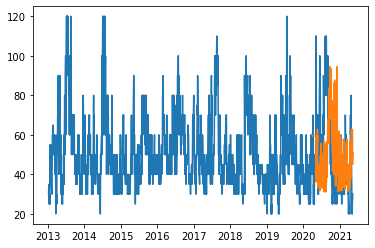

In [66]:
plt.plot(data,y)
plt.plot(date_list,y_pred)